In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;

In [4]:
data = pd.read_csv('./data/COVID_Data_Basic.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54522 entries, 0 to 54521
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    54522 non-null  int64 
 1   Country       54522 non-null  object
 2   Date          54522 non-null  object
 3   Confirmed     54522 non-null  int64 
 4   Death         54522 non-null  int64 
 5   Recovered     54522 non-null  int64 
 6   newConfirmed  54522 non-null  int64 
 7   newDeath      54522 non-null  int64 
 8   newRecovered  54522 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 3.7+ MB


In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54522 entries, 0 to 54521
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    54522 non-null  int64         
 1   Country       54522 non-null  object        
 2   Date          54522 non-null  datetime64[ns]
 3   Confirmed     54522 non-null  int64         
 4   Death         54522 non-null  int64         
 5   Recovered     54522 non-null  int64         
 6   newConfirmed  54522 non-null  int64         
 7   newDeath      54522 non-null  int64         
 8   newRecovered  54522 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 3.7+ MB


In [9]:
# 날짜별 확진자, 사망자, 회복자 합계 구하기
date_status = data.groupby('Date')['Confirmed', 'Death', 'Recovered'].sum()
date_status.sort_index()
date_status

<ipython-input-9-fee007173ebd>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  date_status = data.groupby('Date')['Confirmed', 'Death', 'Recovered'].sum()


,Confirmed,Death,Recovered
Date,,,
2019-12-31,27,0,0
2020-01-01,27,0,0
2020-01-02,27,0,0
2020-01-03,44,0,0
2020-01-04,44,0,0
...,...,...,...
2020-11-02,47011161,1206168,31357886
2020-11-03,47493178,1214178,31609242
2020-11-04,48090690,1225202,31889030


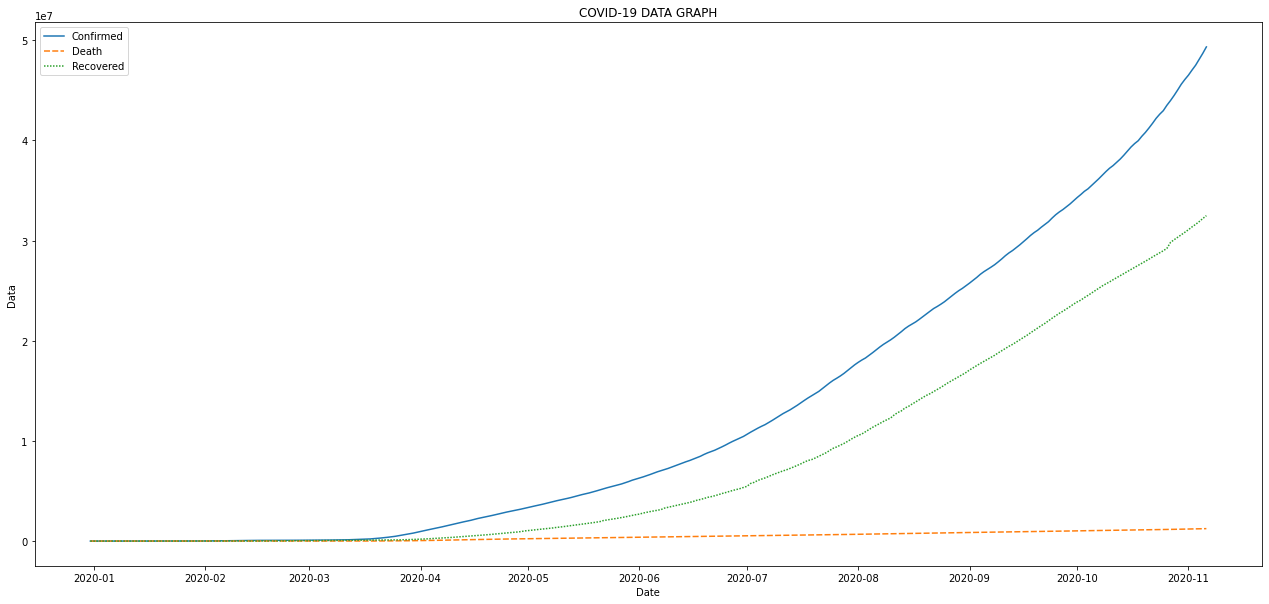

In [40]:
# 시간에 따른 누적 확진자, 사망자, 회복자 그래프(seaborn lineplot)

# figure(스케치 북) 생성
plt.figure(figsize=(22, 10))
plt.title('COVID-19 DATA GRAPH')
plt.ylabel('Data')
plt.xlabel('Date')

#plt.xticks(rotation=45)
sns.lineplot(data=date_status)